# Pertemuan 4



# Library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# DataSet

In [ ]:
#buat data tabular seperti dibawah ini
df = pd.DataFrame(
    {
        "ID Buah" : pd.Series([1,2,3,4,5]),
     "Diameter" : pd.Series([7.0,7.1,6.5,6.6,6.8]),
     "Berat" : pd.Series([165,170,180,195,200]),

    }
)

In [ ]:
df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


# Algoritma K-Means

In [ ]:
#pemilihan feature
df_train = df.drop("ID Buah", axis=1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [ ]:
#fitting/predict/labeling berdasarkan jumlah kluster (n=2)
n = 2
kmeans_model = KMeans(n_clusters=n, n_init=1, random_state=100).fit(df_train)

In [ ]:
#pelabelan cluster
df["kluster"] = kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [ ]:
#hasil dari update centroid
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


# Tantangan dari algoritma K-Means

Limitasi atau tantangan dari algoritma k-means adalah menentukan nilai centroid diawal dan jumlah kluster yang manual, sehingga perlu ada meknisme/metode tertentu untuk memilih centoid diawal dan jumlah cluster

# Pemilihan centroid awal

* Menggunakan pengaturan parameter yang ada di sklearn
* Lebih lengkapnya bisa baca di dokumentasinya https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
#n_cluster merupakan parameter dari jumlah cluster/kelompok yang harus ditentukan
#nilai n_cluster tergantung data, atau bisa berdasarkan metode elbow, dll, defaultnya 8 atau ketika tidak diisi jumlah cluster=8
#n_init merupakan parameter untuk menentukan berapa kali algoritma berapa kali algoritma k-means dijalankan dengan centroid seedyang berbeda
#nilai n_init bisa 1 atau lebih dari 1, defaultnya 10/auto
#random_state merupakan parameter untuk menentukan angka acak sebagai inisiasi centroid
#nilai random_state diisi dengan nilai deterministik (0-100), defaultnya None

#atur parameter untuk kmeans_model_2 ini sehingga berbeda dengan parameter kmeans_model sebelumnya
kmeans_model_2 = KMeans(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,1
1,2,7.1,170,1
2,3,6.5,180,1
3,4,6.6,195,0
4,5,6.8,200,0


# Pemilihan jumlah kluster

 * Menggunakan metode elbow
 * Library nya bisa apa saja, contoh disini  menggunakan library scikit yellowbrick cluster https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [ ]:
#standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

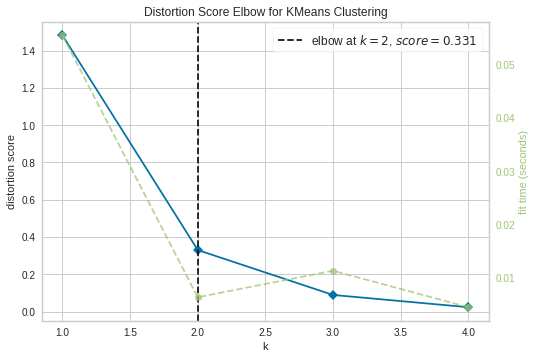

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans(n_init=1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1,5), timings = True)
visualizer.fit(x_scaled)
visualizer.show()

In [ ]:
#parameter n_cluster dibawah ini bisa kita isi dengan nilai dari hasil elbow method, yang mana k=2
#KMeans(n_clusters=k, n_init="auto").fit(df_train)

# Tugas

* Gunakan data dari url ini https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv
* Hasil bisa berbeda tergantung pengolahan data, pemilihan nilai centroid diawal dan jumlah kluster
* Yang menjadi penilaian adalah proses coding dari mulai pengambilan data, pengolahan data, hingga penerapan algoritma k-means

In [18]:
import pandas as pd



url = "https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv"
data = pd.read_csv(url)
data


,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
...,...,...,...,...,...,...,...,...
367,2022041468,91,NaN,31.0,52.0,31.0,46,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


In [19]:
data.dropna(inplace=True)
data

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
5,2022041106,85,95.0,34.0,73.0,57.0,98,not pass
6,2022041107,95,79.0,52.0,54.0,85.0,13,not pass
...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


In [21]:
kmeans = KMeans(n_clusters=n_clusters)

data['pass_test'] = data['pass_test'].replace('not pass', 0)
data['pass_test'] = data['pass_test'].replace('pass', 1)
data['pass_test'] = data['pass_test'].astype(float)

df = pd.DataFrame(data)
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
# menentukan jumlah kluster dan centroid awal
n_clusters = 3
init_centroids =[[80,94,21,61,64,43,0],[82,79,94,65,43,65,1],[84,71,36,46,21,12,0]]

In [15]:
#Tabel cluster
df["cluster"] = kmeans.labels_
df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,cluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,0.0,2
2,2022041103,86,71.0,84.0,17.0,21.0,41,0.0,2
4,2022041105,93,85.0,68.0,29.0,44.0,50,0.0,2
5,2022041106,85,95.0,34.0,73.0,57.0,98,0.0,2
6,2022041107,95,79.0,52.0,54.0,85.0,13,0.0,2
...,...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,0.0,1
368,2022041469,96,87.0,55.0,56.0,95.0,11,1.0,1
369,2022041470,569,83.0,89.0,15.0,86.0,13,0.0,1
370,2022041471,84,92.0,87.0,97.0,42.0,27,1.0,1
